# Import librairies

In [3]:
import pandas as pd # to load and manipulate data and for One-Hot Encoding I
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs

from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree

from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation

from sklearn.metrics import confusion_matrix # to create a confusion matrix

from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix


# Import data and cleaning 

In [4]:
df = pd.read_csv("processed.cleveland.data",header=None)

#https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
df.columns = ["age","sex","cp","restbp","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","hd"]
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [11]:
df["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [12]:
df["thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [19]:
df.loc[(df["ca"] == '?') | (df["thal"] == '?') ]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [20]:
len(df)

303

In [21]:
df_no_missing = df.loc[(df["ca"] != '?') & (df["thal"] != '?') ]

In [22]:
df_no_missing["thal"].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

# Split Data 

In [23]:
#Make a new copy of the columns to make predictions
X = df_no_missing.drop('hd',axis=1)
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [24]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

# One Hot Encoding

In [25]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [26]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [28]:
# Habituelement utilisé Colone transformer de Scikit learn

pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [29]:
X_encoded = pd.get_dummies(X, columns = ['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [30]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [35]:
#In this case, just simple classification (Yes/No)
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1], dtype=int64)

# Build first classification tree

In [37]:
# Split data into training and test dataset
X_train, X_test , y_train, y_test = train_test_split(X_encoded, y , random_state=42)

#create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)


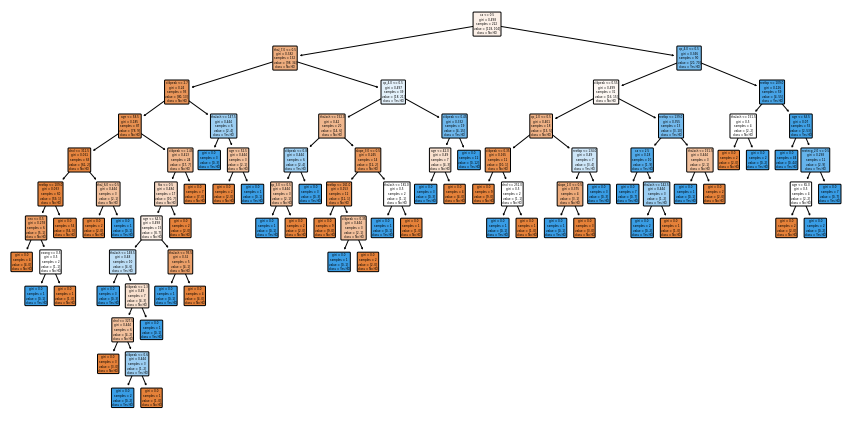

In [38]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, filled=True, rounded=True, class_names=["No HD","Yes HD"],feature_names=X_encoded.columns);

C:\Users\caill\anaconda3\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


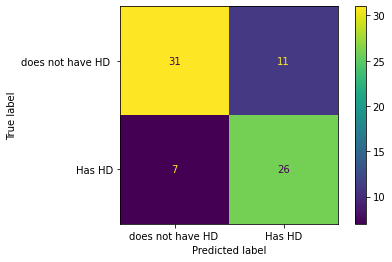

In [39]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["does not have HD ", "Has HD"])

# Pruning the tree

In [43]:

path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha in order to not have a tree with justa  leaf
clf_dts = [] # create an array that we will put decision trees into

## now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt. fit(X_train, y_train)
    clf_dts.append(clf_dt) 


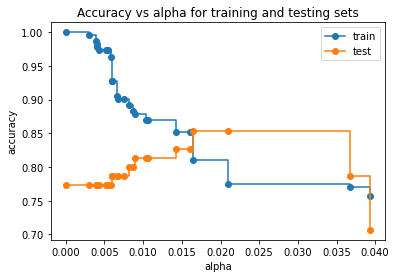

In [48]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax. legend()


# Cross validation

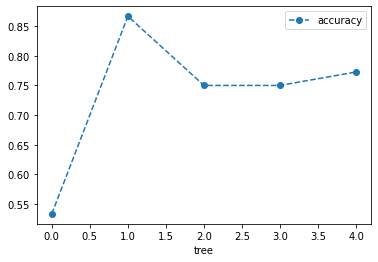

In [56]:
clf_dt= DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)


#5 fold cross validation 

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy':scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')



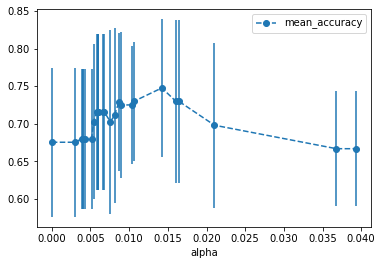

In [57]:
## create an array to store the results of each fold during cross validiation
alpha_loop_values = []

## For each candidate value for alpha, we will run 5-fold cross validation.
## Then we will store the mean and standard deviation of the scores (the accuracy) for each call
## to cross_val_score in alpha_loop_values...
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

## Now we can draw a graph of the means and standard deviations of the scores
## for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [59]:
alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [61]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [62]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

# Building, Evaluating, Drawing and Interpreting the final Classification Tree

In [63]:
#Build and train a new decision tree, only this time use the optimal value for alpha
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

C:\Users\caill\anaconda3\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


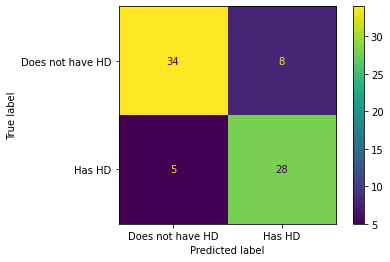

In [64]:
plot_confusion_matrix(clf_dt_pruned, X_test,y_test,display_labels=["Does not have HD","Has HD"])

[Text(0.5769230769230769, 0.875, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.3076923076923077, 0.625, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.15384615384615385, 0.375, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.07692307692307693, 0.125, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.23076923076923078, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(0.46153846153846156, 0.375, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes HD'),
 Text(0.38461538461538464, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(0.5384615384615384, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(0.8461538461538461, 0.625, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes HD'),
 Text(0.7692307692307693, 0.375, 'oldpeak <= 0.5

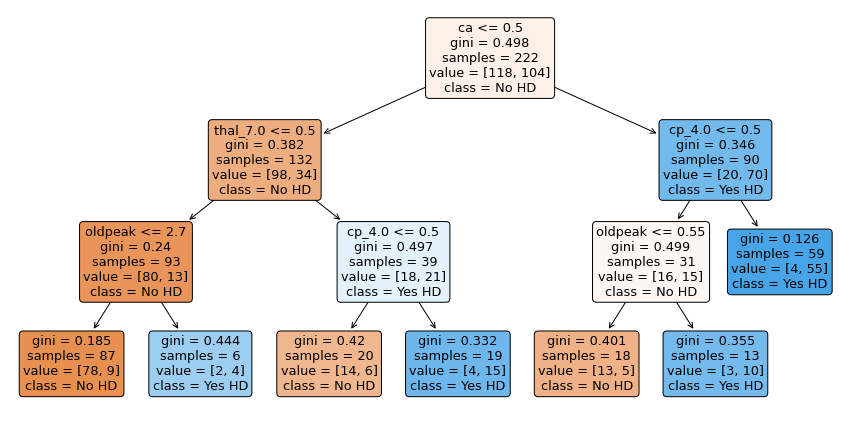

In [67]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned, filled=True,rounded=True,class_names=["No HD","Yes HD"], feature_names=X_encoded.columns)